
# 로지스틱 회귀 실습



1. 모델의 성능 평가를 위한 훈련 세트와 테스트 세트

2. 훈련 세트와 테스트 세트로 나누기

3. 로지스틱 회귀 구현하기

4. 훈련하는 메소드 구현하기(fit()메소드)

5. 예측하는 메소드 구현하기(predict()메소드)

6. 로지스틱 회귀 모델 훈련시키고 테스트 세트 사용해 정확도 평가하기

## 분류용 데이터 세트 준비


### scikit-learn

- 파이썬으로 작성된 데이터 분석을 위한 오픈 소스 라이브러리
- 다른 파이썬 라이브러리를 기반으로 함 (NumPy, Scipy, matplotlib)
- 데이터셋과 머신러닝 알고리즘을 포함함


### sklearn.datasets

- 예제 데이터 셋을 모듈에 내장하여 제공함
- 소량 데이터를 제공하는 load 계열 명령, 대량 데이터를 제공하는 fetch 계열 명령, 가상의 데이터를 생성하는 make 계열 명령이 있음



In [1]:
#1.load_breast_cancer()함수 호출하기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

 ### Bunch
 
 load_breast_cancer() 함수를 호출하면 Bunch라는 이름의 데이터를 가져올 수 있음
 이 객체는 다음의 속성을 지님
 
- data: (필수) 독립 변수 ndarray 배열
- target: (필수) 종속 변수 ndarray 배열
- feature_names: (옵션) 독립 변수 이름 리스트
- target_names: (옵션) 종속 변수 이름 리스트
- DESCR: (옵션) 자료에 대한 설명

In [2]:
#2.입력 데이터 확인하기
import pandas as pd

cancer_data = cancer.data
cancer_label = cancer.target
#print('cancer target값: ', cancer_label)
print('cancer target명: ', cancer.target_names)

cancer_df = pd.DataFrame(data = cancer_data, columns = cancer.feature_names)
cancer_df['label'] = cancer.target
cancer_df.head(3)

cancer target명:  ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [3]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [4]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
#2.입력 데이터 확인하기
print(cancer.data.shape, cancer.target.shape)

#shape으로 데이터의 크기를 알 수 있음
#569개의 샘플과 30개의 특성을 갖는 데이터임

(569, 30) (569,)


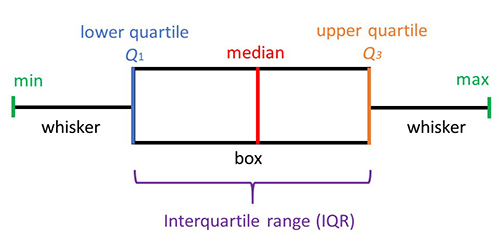

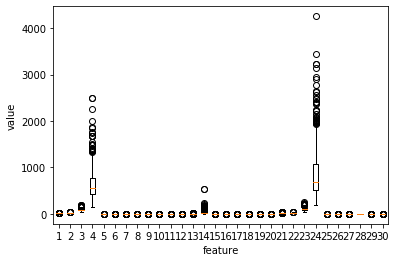

In [24]:
#3.박스플롯으로 특성의 사분위 관찰하기
import matplotlib.pyplot as plt
import numpy as np

plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [7]:
#4.눈에 띄는 특성 살펴보기
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [8]:
#5.타깃데이터 확인하기
np.unique(cancer.target, return_counts=True)

#np.unique: 배열 내 중복값을 제거한 리스트를 출력
#return_counts: 인수를 True로 설정하면 각 값을 가진 데이터 개수를 출력
#타깃데이터에 212개의 음성 클래스와 357개의 양성 클래스가 들어있음

(array([0, 1]), array([212, 357]))

In [9]:
#6.훈련데이터 세트 저장하기
x = cancer.data
y = cancer.target

## 로지스틱 회귀를 위한 뉴런 만들기


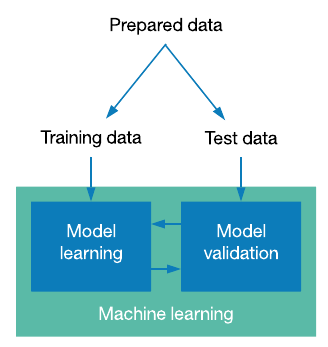

### 예측 프로세스
1. 데이터 세트 분리: 훈련 데이터와 테스트 데이터로 분리(train_test_split())
2. 모델 학습: 훈련 데이터를 기반으로 머신러닝 알고리즘을 적용하여 모델을 학습
3. 예측 수행: 학습된 모델을 이용하여 테스트 데이터의 분류를 예측
4. 평가: 예측 결과값과 실제 결과값을 비교하여 모델 성능을 평가

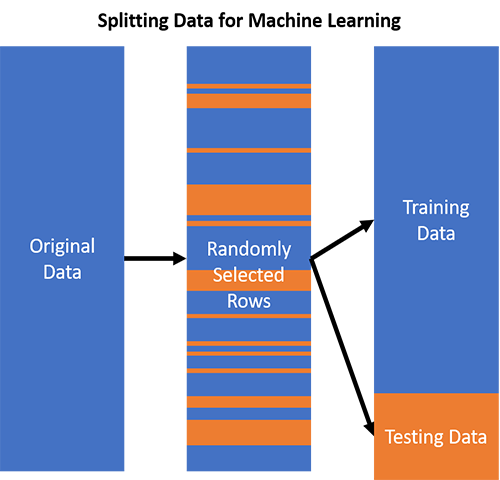

#### 훈련 데이터 세트로 학습된 모델을 다시 훈련 데이터 세트로 평가한다면?
모델이 훈련 데이터 세트를 몽땅 외워버렸다면 평가가 의미가 없으니, 데이터를 분리해야


- cancer 데이터를 훈련 데이터와 테스트용 데이터를 분리하여
    - 훈련 데이터로 훈련한 모델의 성능 측정용으로 테스트 세트 사용
- 훈련 데이터 세트를 훈련 세트와 테스트 세트로 나누는 규칙
    - 테스트 세트보다 훈련 세트가 더 많아야
    - 양성, 음성 클래스가 훈련 세트나 테스트 세트 어느 한쪽에 몰리지 않고 골고루 섞여야


In [10]:
#1.train_test_split()함수로 훈련 데이터 세트 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

#stratify = y: 훈련 데이터를 나눌 때 클래스 비율을 동일하게 만듦
#test_size = 0.2: 테스트 세트의 비율을 전달
#random_state = 42: 난수 초기값 설정

- train_test_split(피처데이터셋, 라벨데이터셋, test_size = 값, random_state = 값)
    - test_size 입력 값의 비율로 데이터를 쉽게 분할할 수 있음
    - 기본적으로 훈련세트 75%, 테스트 세트 25%의 비율로 나눠줌
    - 반환값은 튜플형태: (1) 학습용 데이터 특성 데이터 셋 (2) 테스트용 데이터 특성 데이터 셋 (3) 학습용 데이터 레이블 데이터 셋 (4) 훈련용 데이터 레이블 데이터 셋

In [11]:
#2.결과 확인하기
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [12]:
#3.unique() 함수로 훈련 세트의 타깃 확인하기
np.unique(y_train, return_counts=True)

#타깃데이터에 170개의 음성 클래스와 285개의 양성 클래스가 들어있음

(array([0, 1]), array([170, 285]))

## 로지스틱 회귀 구현하기

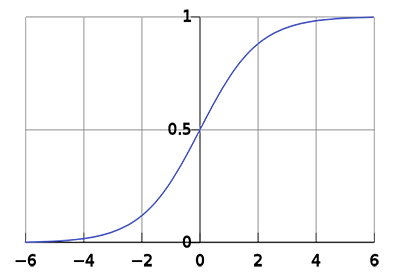

### review_로지스틱 회귀(Logistic Regression)

- y값이 범주형 변수인 경우(binary)에도 다중선형회귀모델을 적용시키기 위해 고안됨
- 회귀식의 결과값이 0과 1로만 도출되면 근사하는 모델을 만들기 어려우니 타겟변수를 확률로 하고자 함
- 타겟변수를 확률로 하는 모델 중 회귀선에 의해 음수값을 추정하거나 1을 초과하는 값을 추정하는 상황을 해결하기 위해 확률값을 무한대로 확장하여 Probability 대신 odds의 개념을 도입
- odds = p(x)/(1-p(x))
- 음수의 무한대까지 표현하기 위해 odds에 로그를 취함(로짓 변환)
- 정리하면 f(x) = 1/(1+e^-x), f(x)는 logistic Function

#### 그리하여 어떤 활성화 함수를 쓰면 좋을까?          에 대한 답!

- 그때 그때 다릅니다

- 다만 오늘 다룰 시그모이드 함수는 인공신경망에서 많이 사용되는 활성화 함수

- 시그모이드 함수는 결과값이 0에서 1인 완만한 곡선 형태라
모든 구간에서 미분이 가능하기 때문에 back propagation에 유용한 특징을 지님

### 구현 과정


**1. 정방향 계산**

- 입력값이 활성화 함수를 거쳐 결과로 나오는 과정


**2. 역방향 계산**

- 결과와 정답의 차이로 계산된 손실을 입력 단까지 다시 전달하는 과정


In [13]:
class LogisticNeuron:

    def __init__(self):
        self.w = None
        self.b = None

  #정방향
    def forpass(self, x):
        z = np.sum(x*self.w) + self.b # 가중치와 입력 특성의 곱을 모두 더하기 위해 np.sum()함수 사용
        return z

  #역방향
    def backprop(self, x, err):
        w_grad = x*err #가중치에 대한 그레디언트를 계산함
        b_grad = 1*err #절편에 대한 그레디언트를 계산함
        return w_grad, b_grad

In [14]:
#넘파이 연산

a = np.array([1,2,3])
b = np.array([3,4,5])
print(a+b)
print(a*b)

np.sum(a*b)

[4 6 8]
[ 3  8 15]


26

### Estimator 클래스
- 적용 알고리즘 모델로 Classifier, Regressor, pipeline 이 사용됨
- 각각의 Estimator는 fit()과 predict()를 내부에서 구현
    - fit(): 모델 학습
    - predict(): 학습된 모델의 예측
    - transform(): 입력된 데이터의 형태에 맞추어 데이터를 변환

### fit() 메소드 구현하기


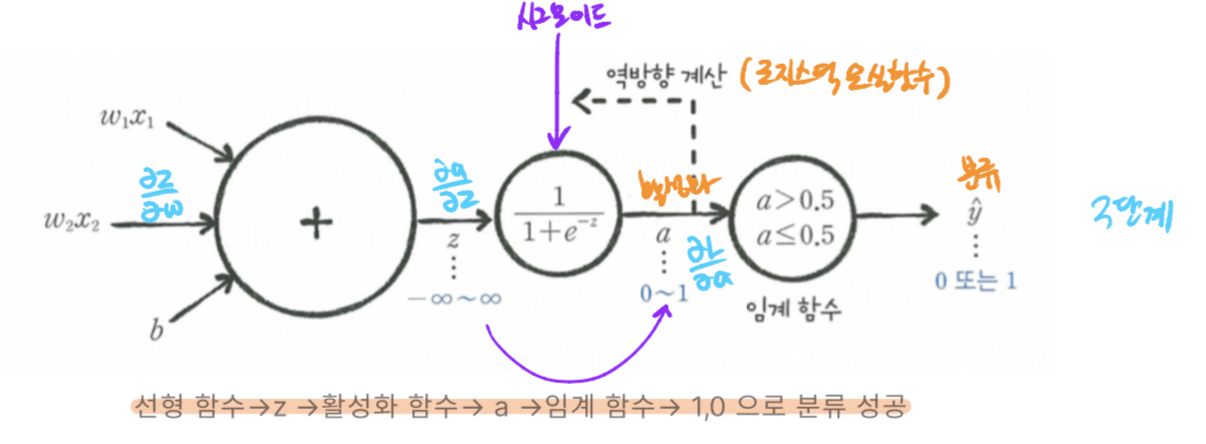

In [15]:
#1.fit() 메소드 구현하기
def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1]) #가중치 초기화
    self.b = 0 #절편 초기화
    for i in range(epochs):
        for x_i, y_i in zip(x,y):
            z = self.forpass(x_i)
            a = self.activation(z)
            err = -(y_i - a)
            w_grad, b_grad = self.backprop(x_i, err) #로지스틱 손실함수의 도함수 적용
            self.w -= w_grad
            self.b -= b_grad

In [16]:
#2.activation() 메소드 구현하기
def activation(self,z):
    a = 1/(1+np.exp(-z)) #시그모이드 계산
    return a

### predict() 메소드 구현하기


In [17]:
#1.predict() 메소드 구현하기
def predict(self, x): #입력값 x는 2차원 배열
    z = [self.forpass(x_i) for x_i in x] #선형함수 적용
    a = self.activation(np.array(z)) #활성화 함수 적용
    return a > 0.5

**List Comprehension**
- 리스트안에 식, for 문을 지정함
- 여러 줄의 코드를 한 줄로 줄일 수 있음

    - [식 for 변수 in iterable]
    - list(식 for 변수 in iterable)
    
- x의 행을 하나씩 꺼내어 forpass() 메서드에 적용하고, 그 결과를 이용하여 새 리스트  z로 만듦

### 구현 내용 한 눈에 보기


In [18]:
class LogisticNeuron:

    def __init__(self):
        self.w = None
        self.b = None

    def forpass(self, x):
        z = np.sum(x*self.w) + self.b # 가중치와 입력 특성의 곱을 모두 더하기 위해 np.sum()함수 사용
        return z

    def backprop(self, x, err):
        w_grad = x*err #가중치에 대한 그레디언트를 계산함
        b_grad = 1*err #절편에 대한 그레디언트를 계산함
        return w_grad, b_grad

    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            for x_i, y_i in zip(x,y):
                z = self.forpass(x_i)
                a = self.activation(z)
                err = -(y_i - a)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad

    def activation(self,z):
        a = 1/(1+np.exp(-z)) #시그모이드 계산
        return a

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x] #선형함수 적용
        a = self.activation(np.array(z)) #활성화 함수 적용
        return a > 0.5


### 로지스틱 회귀 모델 훈련시키기


In [19]:
#1.모델 훈련하기
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

In [20]:
#2.모델의 정확도 평가하기
np.mean(neuron.predict(x_test) == y_test)

0.8245614035087719

In [21]:
#predict() 메서드의 반환값은 True나 False로 채워진 (m, ) 크기의 배열
#y_test는 0 또는 1로 채워진 (m, ) 크기의 배열
#둘을 비교 가능

print(neuron.predict(x_test))
print(y_test)
print(neuron.predict(x_test) == y_test)

[False  True False False False False  True False False False  True False
  True False False False False  True False  True False False  True  True
  True False False  True  True False  True  True  True  True False  True
  True  True False False  True  True  True False False False  True  True
  True False  True False  True False  True  True  True False False  True
  True  True  True  True False False False  True False  True  True  True
  True False False False  True  True  True False False  True False  True
 False  True  True  True False False  True  True False False False  True
 False  True False False False False  True  True False False  True False
  True False  True False  True  True]
[0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 1]
[ True  True  True False  True False  True  True  True  True  True  True

In [22]:
#당연하게도 사이킷런에는 이미 로지스틱 모델이 제공됨
from sklearn.linear_model import LogisticRegression
cc = LogisticRegression(C=100.0, random_state = 42)
cc.fit(x_train, y_train)

/Users/myung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
np.mean(cc.predict(x_test) == y_test)

0.9736842105263158